In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Ingrese ID: 4242274023
id: 4242274023
group_name: MB-AR-Daily Report-Apr 11th
user_name: Paula
is_have_story: Yes
gift coins: 400
host_wall_coins: 440
friend_video_coins: 4200
task coins: 0
box_coins: 0
total coins-Apr 11th: 5040
group_time: 2023-01-17 05:34:56
match_count: 0
match_times_duration: 0.0
kyc_pass: pass
video_status: uploaded
category: Group I
avg_friend_call_video_time-30days: 188
bank_country_ab: 0
long_call_ratio: 0.1321
total coins-Apr 10th-Apr 11th: 21120


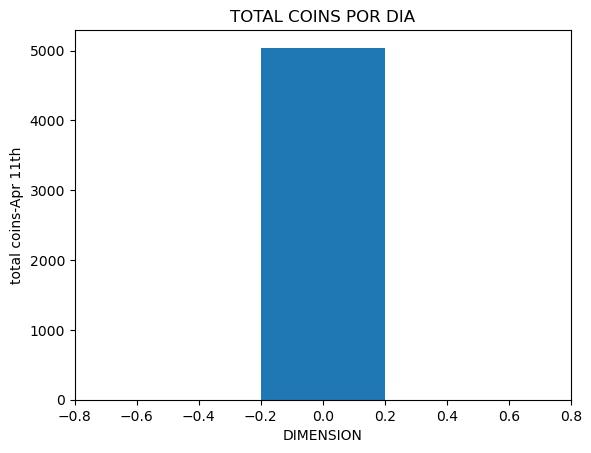

In [41]:
# Lee el archivo Excel por día
archivo = "/home/teylor/Documentos/archivos_excel/MB-AR-Daily Report-Apr 11th.xlsx"
datos = pd.read_excel(archivo)

# Convierte la columna de fechas a formato de fecha
datos['group_time'] = pd.to_datetime(datos['group_time'])

# # Imprime las dimensiones del DataFrame
# print("Dimensiones ==> filas, columnas")
# print(datos.shape)

# # Imprime las 5 filas del inicio para validación
# print(datos.head())

#elimina usuarios que no tienen verificacion kyc_pass
def eliminar_filas_vacias(datos):
    datos_sin_vacios = datos.dropna(subset=['kyc_pass'], inplace=False)
    return datos_sin_vacios

datos = eliminar_filas_vacias(datos)


id_ingresado = input("Ingrese ID: ")

# Utiliza el método loc para filtrar el DataFrame por el ID ingresado
filtro = datos['id'] == int(id_ingresado)
fila = datos.loc[filtro]

if not fila.empty:
    # Imprime los valores de la fila encontrada con los nombres de las columnas
    for columna, valor in fila.items():
        print(f"{columna}: {valor.item()}")

    # Obténer el valor de la columna en el índice 9
    columna_indice_9 = fila.iloc[:, 9]

    # Configura el ancho de la barra
    ancho_barra = 0.4

    # Genera el gráfico de barras
    plt.bar(range(len(columna_indice_9)), columna_indice_9, width=ancho_barra)
    plt.xlabel("DIMENSION")
    plt.ylabel(fila.columns[9])
    plt.title(f"TOTAL COINS POR DIA")

    # Ajusta los límites del eje x para centrar las barras
    plt.xlim(-ancho_barra / 0.5, len(columna_indice_9) - 1 + ancho_barra / 0.5)

    plt.show()
else:
    print("No se encontraron coincidencias o no ha sido verificado por kyc_pass")